In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
df = pd.read_csv("..\IMDB Dataset.csv")

In [6]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [45]:
df.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [47]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [48]:
movies_df = df.iloc[:100, :]

In [49]:
movies_df.columns = ['review','label']

In [50]:
del(df)

d:\programming\question-challenge\ambrapali-electrotech\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

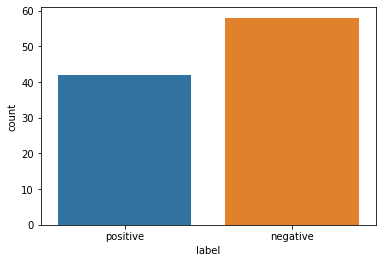

In [51]:
sns.countplot(movies_df['label'])

In [52]:
sentences=movies_df['review'].tolist()
sentences=''.join(sentences)

In [53]:
# plt.figure(figsize=(20,20))
# plt.imshow(WordCloud().generate(sentences))

In [54]:
import nltk
import string
# nltk.download()
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [55]:
stemmer = PorterStemmer()
unnecessary_words = ["br","'ll","..","....","n't","..."," ... "]
punctuation = list(string.punctuation)
def review_to_words(sentence):
    words = nltk.word_tokenize(sentence)
    words_list = list()
    for word in words:
        word = word.lower()
        letter_list = list()
        # print(word)
        if word not in stopwords.words('english'):
            if word not in unnecessary_words:
                for letter in word:
                    if letter not in string.punctuation:
                        letter_list.append(letter)
                if letter_list:
                    word = ''.join(letter_list)
                    words_list.append(stemmer.stem(word))
    return words_list

In [56]:
# with_split = review_to_words(movies_df['review'][0])
# movies_df['review'][0]
movies_df_cleaned = movies_df
movies_df_cleaned["review"] = movies_df['review'].apply(review_to_words)

In [57]:
movies_df_cleaned.to_csv("test.csv")

In [58]:
cleaned_df = pd.read_csv("test.csv")

In [59]:
print(cleaned_df[cleaned_df['label']=='positive'].count())
print(cleaned_df[cleaned_df['label']=='negative'].count())

Unnamed: 0    42
review        42
label         42
dtype: int64
Unnamed: 0    58
review        58
label         58
dtype: int64


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
movies_vectorizer=CountVectorizer().fit_transform(cleaned_df['review'])

In [67]:
print(type(movies_vectorizer)) # type vector
X=movies_vectorizer # type 2d matrix
print(X.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(100, 3767)


In [68]:
y=cleaned_df['label']

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

NB_classifier=MultinomialNB()
svc = LinearSVC()
NB_classifier.fit(x_train,y_train) #training our model using training dataset
svc.fit(x_train, y_train)

LinearSVC()

In [86]:
from sklearn.metrics import confusion_matrix , classification_report, f1_score

y_test_predictions=NB_classifier.predict(x_test)
y_test_pred_svm = svc.predict(x_test)

Text(0.5, 1.0, 'With Linear SVC')

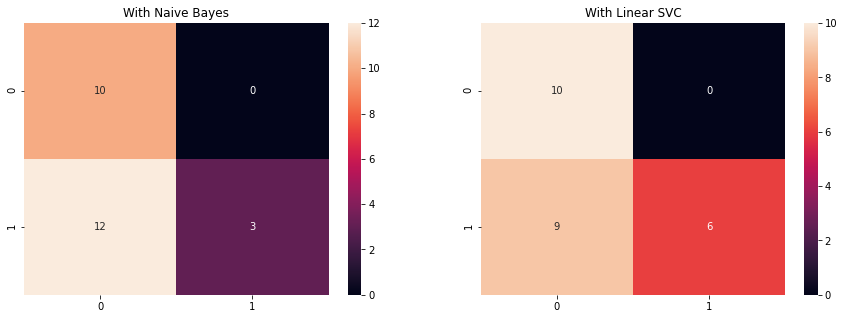

In [87]:
cm=confusion_matrix(y_test,y_test_predictions)
cm2=confusion_matrix(y_test,y_test_pred_svm)

fig, axis = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(ax = axis[0],data= cm,annot=True)
axis[0].set_title("With Naive Bayes")

sns.heatmap(ax = axis[1],data=cm2,annot=True)
axis[1].set_title("With Linear SVC")

In [88]:
print(classification_report(y_test,y_test_predictions))
print(classification_report(y_test,y_test_pred_svm))

              precision    recall  f1-score   support

    negative       0.45      1.00      0.62        10
    positive       1.00      0.20      0.33        15

    accuracy                           0.52        25
   macro avg       0.73      0.60      0.48        25
weighted avg       0.78      0.52      0.45        25

              precision    recall  f1-score   support

    negative       0.53      1.00      0.69        10
    positive       1.00      0.40      0.57        15

    accuracy                           0.64        25
   macro avg       0.76      0.70      0.63        25
weighted avg       0.81      0.64      0.62        25



In [99]:
f1_score(y_test,y_test_predictions,average="weighted")

0.45

In [3]:
import joblib
# filename = 'NB_classifier.sav'
# joblib.dump(NB_classifier, filename)

In [4]:
nb_model = joblib.load("NB_classifier.sav")

In [32]:
review = ["Its", "a", "very" ,"good" ,"movie"]
x = movies_vectorizer.transform(review).toarray()
nb_model.predict(x)

AttributeError: transform not found

In [8]:
df = pd.read_csv("..\\test.csv")

In [9]:
df.head(10)

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic s famili littl boy jake think s zombi cl...,negative
4,petter mattei s love time money visual stun fi...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,show amaz fresh innov idea 70 s first air firs...,negative
8,encourag posit comment film look forward watch...,negative
9,like origin gut wrench laughter like movi youn...,positive


In [14]:
a = df.columns
df[a[1]] = df[a[1]].apply(lambda x: 1 if x == "positive" else 0)

In [15]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic s famili littl boy jake think s zombi cl...,0
4,petter mattei s love time money visual stun fi...,1
